In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


In [3]:
train = shuffle(pd.read_csv('trainBal.csv'))

In [10]:
trainSample = train.sample(10000)

In [11]:
tfidf = TfidfVectorizer(strip_accents='ascii',lowercase=True,stop_words='english',max_features = 5000)
tfidfX = tfidf.fit_transform(trainSample['cleanedString'])
tfidfDF = pd.DataFrame(tfidfX.toarray(),columns=tfidf.get_feature_names_out())

In [12]:
baseColumns = list(tfidfDF.columns)
filteredColumns = [x for x in baseColumns if not re.search(r'[^a-zA-Z]',x)]
tfidfClean = tfidfDF[filteredColumns]

In [111]:
tfidfClean.sample(1000).to_csv('trainTFIDF.csv')

In [100]:
num_topics = 4

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')


In [101]:
LDA_DH_Model = lda_model_DH.fit_transform(tfidfX)

In [102]:
print("SIZE: ", LDA_DH_Model.shape)

SIZE:  (10000, 4)


In [103]:
print("First Post...")
print(LDA_DH_Model[0])
print("Sixth Post...")
print(LDA_DH_Model[5])


First Post...
[0.0563082  0.83128594 0.05628157 0.05612429]
Sixth Post...
[0.67703287 0.03700359 0.25236372 0.03359982]


In [96]:
vocab = filteredColumns

In [104]:
vocab = tfidf.get_feature_names_out()

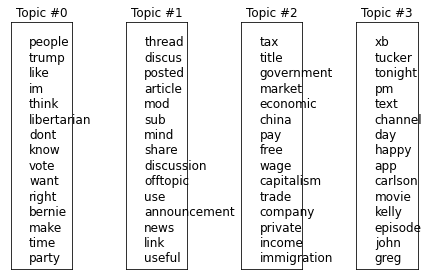

In [105]:
import matplotlib.pyplot as plt
import numpy as np

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 12

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 1)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
# plt.figsize(600,600)

# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
# f.show()

In [38]:
f.savefig('lda.png')

In [39]:
f.show()

C:\Users\darkc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


In [37]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [59]:

import pyLDAvis.sklearn as LDAvis
import pyLDAvis


In [65]:
dtm = np.matrix(tfidf)

In [74]:
print(lda_model_DH.components_)
print(LDA_DH_Model)
print(tfidf)

[[ 0.20026476  0.20025736  0.20017178 ...  0.20025433  0.20022322
   0.20028359]
 [ 2.87290494  1.9933475   1.22472054 ... 10.31647051  3.55333002
   4.98137767]
 [ 0.20050247  0.20024774  0.20381809 ...  0.20157785  0.20131607
   0.20050951]
 [ 0.20037281  0.20024067  0.20015638 ...  0.20044543  0.52711721
   0.20021274]
 [ 0.20026949  0.20032062  0.2002151  ...  0.20028205  0.20022803
   0.20028774]]
[[0.04489332 0.04500083 0.8189426  0.04627101 0.04489224]
 [0.03060611 0.87681197 0.03109675 0.03087801 0.03060715]
 [0.04247076 0.83072188 0.04235641 0.04222989 0.04222106]
 ...
 [0.02067528 0.91309935 0.01549155 0.03506775 0.01566607]
 [0.03750794 0.84925714 0.038213   0.03750936 0.03751257]
 [0.03567369 0.85354484 0.03586527 0.03923918 0.03567703]]
TfidfVectorizer(max_features=5000, stop_words='english', strip_accents='ascii')


In [78]:
dtm = np.matrix(tfidfClean)

In [107]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model_DH, tfidfX,tfidf,mds='tsne')

pyLDAvis.save_html(panel, "lda.html")


C:\Users\darkc\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\darkc\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
C:\Users\darkc\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\darkc\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Users\darkc\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne

In [108]:
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  74.989132
2        1.782994 -295.079681       2        1  13.060919
3      220.811432 -343.832123       3        1   5.981079
1       50.533993  -76.050934       4        1   5.968871, topic_info=         Term        Freq       Total Category  logprob  loglift
4975       xb  156.000000  156.000000  Default  30.0000  30.0000
4526   thread   87.000000   87.000000  Default  29.0000  29.0000
4335      sub  108.000000  108.000000  Default  28.0000  28.0000
273   article   70.000000   70.000000  Default  27.0000  27.0000
3355     post  104.000000  104.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
3355     post   23.092981  104.082692   Topic4  -4.7881   1.3130
813   comment   16.781565   58.118419   Topic4  -5.1074   1.5764
4516    thing   21.558170  116.102152   Topic4  -4.8569   1.1349
707     check   12.212699   37.774906   Topic4  -5.4252   1.6894
1887  general   10.195082   49.934882   Topic4  -5.6057   1.2298

[206 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
62        3  0.899393          adam
170       1  0.984064      american
192       4  0.980757  announcement
217       3  0.945818           app
262       3  0.902187       arizona
...     ...       ...           ...
4943      2  0.776423        worker
4975      3  0.992271            xb
4982      1  0.986441          year
4994      1  0.523823       youtube
4994      3  0.471441       youtube

[248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])